# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import scipy.stats as sts
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
# print(json.dumps(weather_json, indent = 4))

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_count = 0

city_dict = {}
city_list = []

city_name_list = []
city_lat_list = []
city_lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []



print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    city_count += 1
    
    if city_count <= 9:
        
        try:
            print(f'Processing Record Number 0{city_count} | {city}')
            query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            city_name_list.append(weather_json['name'])
            city_lat_list.append(weather_json['coord']['lat'])
            city_lng_list.append(weather_json['coord']['lon'])
            max_temp_list.append(weather_json['main']['temp_max'])
            humidity_list.append(weather_json['main']['humidity'])
            cloudiness_list.append(weather_json['clouds']['all'])
            wind_speed_list.append(weather_json['wind']['speed'])
            country_list.append(weather_json['sys']['country'])
            date_list.append(weather_json['dt'])

        except:
            print("City not found. Skipping...")
        
    else:
        try:
            print(f'Processing Record Number {city_count} | {city}')
            query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            city_name_list.append(weather_json['name'])
            city_lat_list.append(weather_json['coord']['lat'])
            city_lng_list.append(weather_json['coord']['lon'])
            max_temp_list.append(weather_json['main']['temp_max'])
            humidity_list.append(weather_json['main']['humidity'])
            cloudiness_list.append(weather_json['clouds']['all'])
            wind_speed_list.append(weather_json['wind']['speed'])
            country_list.append(weather_json['sys']['country'])
            date_list.append(weather_json['dt'])

        except:
            print("City not found. Skipping...")
        
city_dict = {'City_Name': city_name_list,
                'Lat': city_lat_list, 
                'Lon': city_lng_list, 
                'Max_Temp': max_temp_list, 
                'Humidity': humidity_list,
                'Clouds': cloudiness_list,
                'Wind_Speed': wind_speed_list,
                'Country': country_list,
                'Date': date_list}


Beginning Data Retrieval
-----------------------------
Processing Record Number 01 | butaritari
Processing Record Number 02 | albany
Processing Record Number 03 | dikson
Processing Record Number 04 | taoudenni
Processing Record Number 05 | castro
Processing Record Number 06 | longyearbyen
Processing Record Number 07 | lagoa
Processing Record Number 08 | port alfred
Processing Record Number 09 | hermanus
Processing Record Number 10 | lolua
City not found. Skipping...
Processing Record Number 11 | hilo
Processing Record Number 12 | villa rica
Processing Record Number 13 | belushya guba
City not found. Skipping...
Processing Record Number 14 | sola
Processing Record Number 15 | charters towers
Processing Record Number 16 | zhigansk
Processing Record Number 17 | punta arenas
Processing Record Number 18 | vestmanna
Processing Record Number 19 | barrow
Processing Record Number 20 | ancud
Processing Record Number 21 | upata
Processing Record Number 22 | yellowknife
Processing Record Number 23

Processing Record Number 194 | ojinaga
Processing Record Number 195 | grand river south east
City not found. Skipping...
Processing Record Number 196 | otradnoye
Processing Record Number 197 | carnarvon
Processing Record Number 198 | rock sound
Processing Record Number 199 | isangel
Processing Record Number 200 | dalvik
Processing Record Number 201 | alofi
Processing Record Number 202 | qaqortoq
Processing Record Number 203 | sistranda
Processing Record Number 204 | tigzirt
Processing Record Number 205 | banswada
Processing Record Number 206 | galchino
City not found. Skipping...
Processing Record Number 207 | muroto
Processing Record Number 208 | mahanoro
Processing Record Number 209 | ilhabela
Processing Record Number 210 | ahipara
Processing Record Number 211 | sungaipenuh
Processing Record Number 212 | okhotsk
Processing Record Number 213 | mys shmidta
City not found. Skipping...
Processing Record Number 214 | guerrero negro
Processing Record Number 215 | pala
Processing Record Num

Processing Record Number 391 | omboue
Processing Record Number 392 | kirakira
Processing Record Number 393 | husavik
Processing Record Number 394 | bitlis
Processing Record Number 395 | kupang
Processing Record Number 396 | beloha
Processing Record Number 397 | novikovo
Processing Record Number 398 | verkhoyansk
Processing Record Number 399 | keetmanshoop
Processing Record Number 400 | hithadhoo
Processing Record Number 401 | monte cristi
City not found. Skipping...
Processing Record Number 402 | rapid valley
Processing Record Number 403 | progreso
Processing Record Number 404 | ponta do sol
Processing Record Number 405 | ericeira
Processing Record Number 406 | rajsamand
Processing Record Number 407 | sindor
Processing Record Number 408 | kismayo
Processing Record Number 409 | lethem
Processing Record Number 410 | ruatoria
City not found. Skipping...
Processing Record Number 411 | andevoranto
City not found. Skipping...
Processing Record Number 412 | heihe
Processing Record Number 413 

Processing Record Number 579 | sao jose da coroa grande
Processing Record Number 580 | manaus
Processing Record Number 581 | broken hill
Processing Record Number 582 | kutum
Processing Record Number 583 | rocky mountain house
Processing Record Number 584 | paracatu
Processing Record Number 585 | cheuskiny
City not found. Skipping...
Processing Record Number 586 | hamza
Processing Record Number 587 | gopalpur
Processing Record Number 588 | sao jose do belmonte
Processing Record Number 589 | acarau
Processing Record Number 590 | san policarpo
Processing Record Number 591 | kavieng
Processing Record Number 592 | morehead
Processing Record Number 593 | mazamari
Processing Record Number 594 | balakhta
Processing Record Number 595 | quatre cocos
Processing Record Number 596 | las vegas
Processing Record Number 597 | tessalit
Processing Record Number 598 | brae
Processing Record Number 599 | iqaluit
Processing Record Number 600 | bonavista
Processing Record Number 601 | novyy svit
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_dict)

In [6]:
city_df.set_index('City_Name')

,Lat,Lon,Max_Temp,Humidity,Clouds,Wind_Speed,Country,Date
City_Name,,,,,,,,
Butaritari,3.07,172.79,83.34,70,62,10.58,KI,1598738087
Albany,42.60,-73.97,80.01,82,75,9.91,US,1598738076
Dikson,73.51,80.55,42.01,98,100,16.80,RU,1598738095
Taoudenni,22.68,-3.98,98.51,34,48,14.23,ML,1598738232
Castro,-24.79,-50.01,63.81,73,0,3.89,BR,1598738110
...,...,...,...,...,...,...,...,...
Tshikapa,-6.42,20.80,81.10,57,45,2.93,CD,1598738354
Mareeba,-17.00,145.43,70.00,85,97,3.00,AU,1598738355
Strai,58.20,7.90,55.99,100,0,4.70,NO,1598738355


In [7]:
city_df.to_csv('city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# checks to see if there are any cities in the list with more than 100% humidity.

extra_humid = 0

for h in city_df['Humidity']:
    if h > 100:
        extra_humid =+ 1
        
if extra_humid > 0:
    print("You need to do this step!")

else:
    print("You can skip this step!")

You can skip this step!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
current_date = date.today()

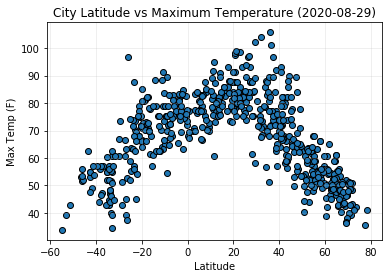

In [12]:
lat_plot = city_df['Lat']
temp_plot = city_df['Max_Temp']

plt.scatter(lat_plot, temp_plot, edgecolor="k")
plt.title(f'City Latitude vs Maximum Temperature ({current_date})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig("Figures/Lat_vs_Temp.png")

# Analyzing how maximum temperature is affected by the change in latitude

## Latitude vs. Humidity Plot

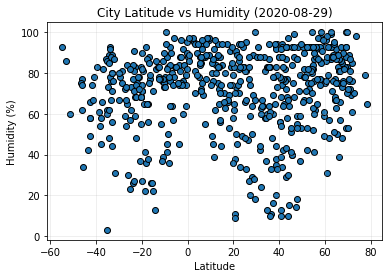

In [13]:
humidity_plot = city_df['Humidity']

plt.scatter(lat_plot, humidity_plot, edgecolor="k")
plt.title(f'City Latitude vs Humidity ({current_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Figures/Lat_vs_Humidity.png')

# Analyzing how humidity is affected by the change in latitude

## Latitude vs. Cloudiness Plot

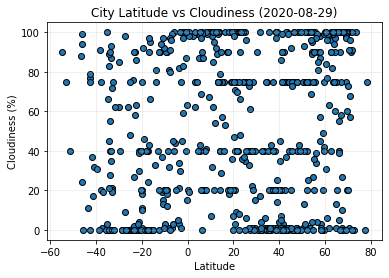

In [14]:
clouds_plot = city_df['Clouds']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Cloudiness ({current_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Figures/Lat_vs_Clouds.png')

# Analyzing how cloudiness is affected by the change in latitude

## Latitude vs. Wind Speed Plot

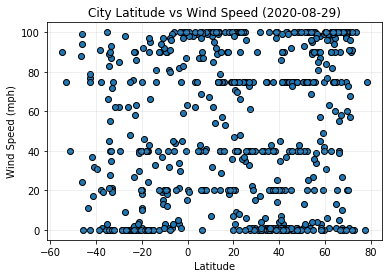

In [15]:
windSpeed_plot = city_df['Wind_Speed']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Wind Speed ({current_date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Figures/Lat_vs_WindSpeed.png')

# Analyzing how cloudiness is affected by the change in latitude

## Linear Regression

In [16]:
#Isolating the northern latitudes
lat_north = city_df.loc[city_df['Lat']>=0]
north_df = pd.DataFrame(lat_north)

In [17]:
#isolating the southern latitudes
lat_south = city_df.loc[city_df['Lat']<0]
south_df = pd.DataFrame(lat_south)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

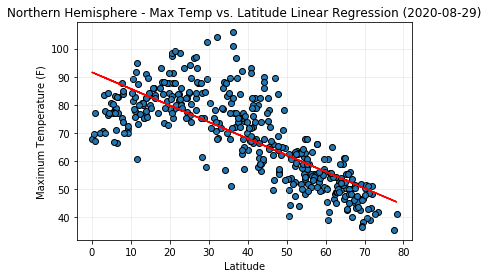

The linear regression line equation is: y = -0.59x + 91.57.
The correlation is: -0.77 indicating a strong negative correlation.


In [18]:
x_values = north_df['Lat']
y_values = north_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)} indicating a strong negative correlation.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

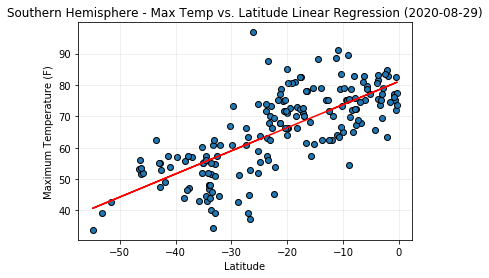

The linear regression line equation is: y = 0.74x + 81.13.
The correlation is: 0.73 indicating a strong positive correlation.


In [19]:
x_values = south_df['Lat']
y_values = south_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)} indicating a strong positive correlation.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

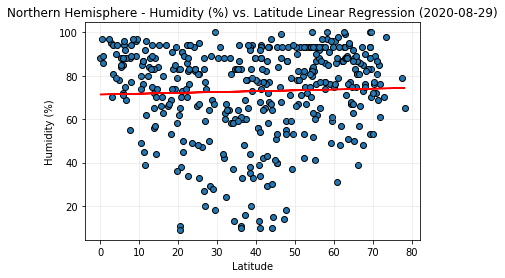

The linear regression line equation is: y = 0.04x + 71.34.
The correlation is: 0.04, which does not indicate a very strong coorelation.


In [20]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

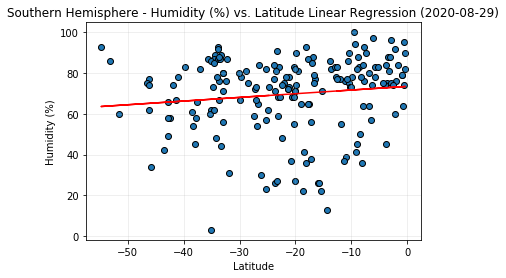

The linear regression line equation is: y = 0.18x + 73.45.
The correlation is: 0.13, which does not indicate a very strong coorelation.


In [21]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

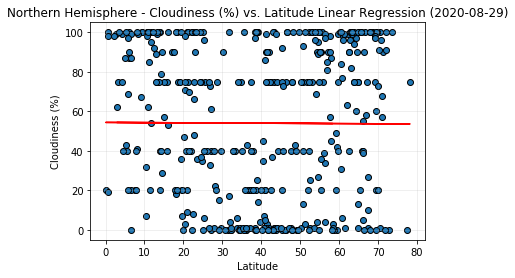

The linear regression line equation is: y = -0.01x + 54.38.
The correlation is: -0.01, which indicates there is no coorelation.


In [22]:
x_values = north_df['Lat']
y_values = north_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which indicates there is no coorelation.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

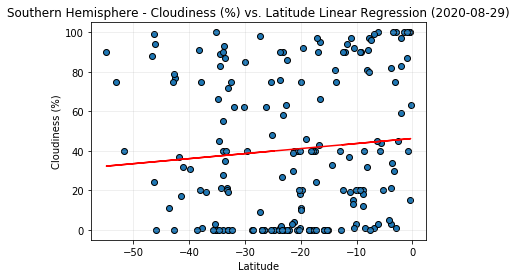

The linear regression line equation is: y = 0.26x + 46.26.
The correlation is: 0.09, which does not indicate a very strong coorelation.


In [23]:
x_values = south_df['Lat']
y_values = south_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

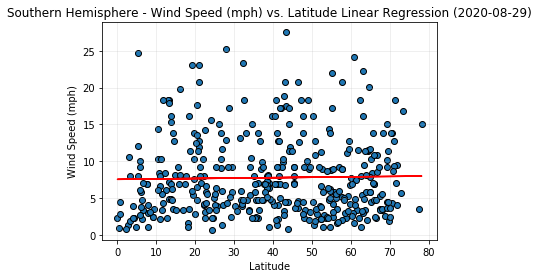

The linear regression line equation is: y = 0.01x + 7.53.
The correlation is: 0.02, which does not indicate a very strong coorelation.


In [24]:
x_values = north_df['Lat']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

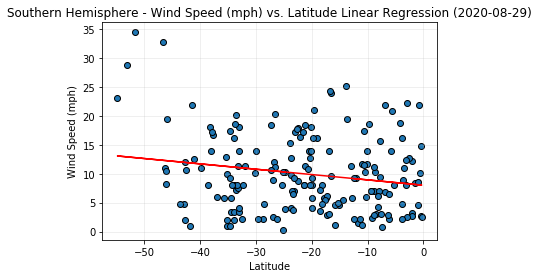

The linear regression line equation is: y = -0.09x + 8.0.
The correlation is: -0.18, which does not indicate a very strong coorelation.


In [25]:
x_values = south_df['Lat']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')